In [6]:
library(matrixStats)
library("randomForest")
library(e1071)
library(plotROC)

#install.packages("tidyverse")
library(tidyverse)
library(modelr)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37

library(biomaRt)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
 

In [7]:
library(survival)
library(survminer)
library(coin)

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [8]:
source("TMB_Funcs.txt")
# My Stuff!

path_name <- "/Volumes/CCG8/processed_data"
genome <- BSgenome.Hsapiens.UCSC.hg19
ensembl = useMart("ensembl", dataset = "hsapiens_gene_ensembl", host = "www.ensembl.org")
ensembl37 = useMart(host = "grch37.ensembl.org", biomart = "ENSEMBL_MART_ENSEMBL", dataset = "hsapiens_gene_ensembl")
select <- dplyr::select

### Loading Data

In [9]:
three_cancer_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/three_cancer_data")
lung_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/lung_data")

In [44]:
lung_data[["training_data"]] <- lung_data[["training_data"]] %>% 
    filter(study == "nsclc_tcga_broad_2016")

lung_data[["test_data"]] <- lung_data[["test_data"]] %>% 
    filter(study == "nsclc_tcga_broad_2016")


In [10]:
tmb_data <- cbio_getData(path_name, "mixed", by_cancer = TRUE, test = FALSE) %>% 
    filter(study == "tmb_mskcc_2018") %>% 
    select(-study)

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "all_stjude_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 44


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "cellline_ccle_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  MA = col_integer(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "cellline_nci60"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer()
  # ... with 4 more columns
)
See spec(...) for full column specifications.


[1] 60


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "hnc_mskcc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double()
  # ... with 7 more columns
)
See spec(...) for full column specifications.


[1] 127


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mixed_allen_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Transcript_Exon = col_integer(),
  t_alt_count = col_integer(),
  t_ref_count = col_integer(),
  Pr_somatic_clonal = col_double(),
  Pr_germline = col_integer(),
  Pr_subclonal = col_double(),
  homozygous.ix = col_logical(),
  ccf_hat = col_double(),
  clonal_dm = col_integer(),
  hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 249


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mixed_pipseq_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.


[1] 99


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "msk_impact_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 10078


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pediatric_dkfz_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parse

[1] "summit_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  ExAC_AF_Adj = col_double()
)
See spec(...) for full column specifications.


[1] 106


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "tmb_mskcc_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 1608


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 11172


In [11]:
tmb_panel <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/TMB_panel_genes")
icb_panel <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/ICB_panel_genes")
impact_panel <- tmb_data %>% 
    pull(Hugo_Symbol) %>% 
    unique()
icb_plus_panel <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/ICB_plus_panel_genes")

tmb_panel_bed <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/TMB_panel.bed")
icb_panel_bed <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/ICB_panel.bed")
impact_panel_bed <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/IMPACT_panel.bed")
icb_plus_panel_bed <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/ICB_plus_panel.bed")

Parsed with column specification:
cols(
  panel = col_character()
)
Parsed with column specification:
cols(
  panel = col_character()
)
Parsed with column specification:
cols(
  panel = col_character()
)
Parsed with column specification:
cols(
  chrom = col_character(),
  chromStart = col_integer(),
  chromEnd = col_integer()
)
Parsed with column specification:
cols(
  chrom = col_character(),
  chromStart = col_integer(),
  chromEnd = col_integer()
)
Parsed with column specification:
cols(
  chrom = col_character(),
  chromStart = col_integer(),
  chromEnd = col_integer()
)
Parsed with column specification:
cols(
  chrom = col_character(),
  chromStart = col_integer(),
  chromEnd = col_integer()
)


### Analysis (Size)

In [12]:
icb_panel_bed %>% 
    mutate(diff = chromEnd - chromStart) %>% 
    pull(diff) %>% 
    sum()

icb_plus_panel_bed %>% 
    mutate(diff = chromEnd - chromStart) %>% 
    pull(diff) %>% 
    sum()

impact_panel_bed %>% 
    mutate(diff = chromEnd - chromStart) %>% 
    pull(diff) %>% 
    sum()

[1] 259292

[1] 270170

[1] 1181644

Impact panel is over four times larger

### Analysis (TMB Calculation)

In [45]:
panel_lin_mod <- get_gene_model(tmb_panel$panel, lung_data[["training_data"]])
panel_rf_mod <- get_gene_f_model(tmb_panel$panel, lung_data[["training_data"]])
panel_svm_mod <- get_gene_svm_model(tmb_panel$panel, lung_data[["training_data"]])

train_matrix <- get_gene_matrix(lung_data[["training_data"]], tmb_panel$panel)
test_matrix <- get_gene_matrix(lung_data[["test_data"]], tmb_panel$panel)

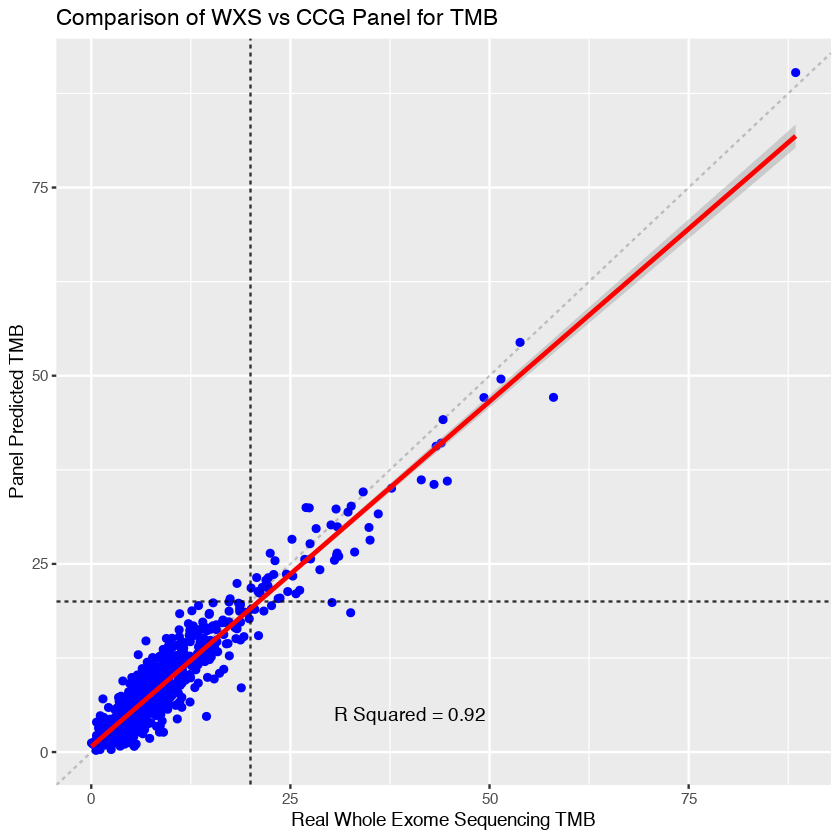

In [46]:
testModel(panel_lin_mod, train_matrix, type = "W") %>% 
    {ggplot(., aes(x = actual, y = prediction)) + geom_point(colour = "blue") + 
    labs(x = "Real Whole Exome Sequencing TMB", y = "Panel Predicted TMB") + 
    geom_abline(intercept = 0, slope = 1, alpha = 0.2, linetype = 2) +
    geom_hline(yintercept = 20, alpha = 0.8, linetype = 2) + geom_vline(xintercept = 20, alpha = 0.8, linetype = 2) + 
    geom_smooth(method = "lm", colour = "red") + labs(title = "Comparison of WXS vs CCG Panel for TMB") +
    annotate("text", x = 40, y = 5, label = paste("R Squared =", round(broom::glance(lm(.$actual ~ .$prediction))$r.squared, 2)))}


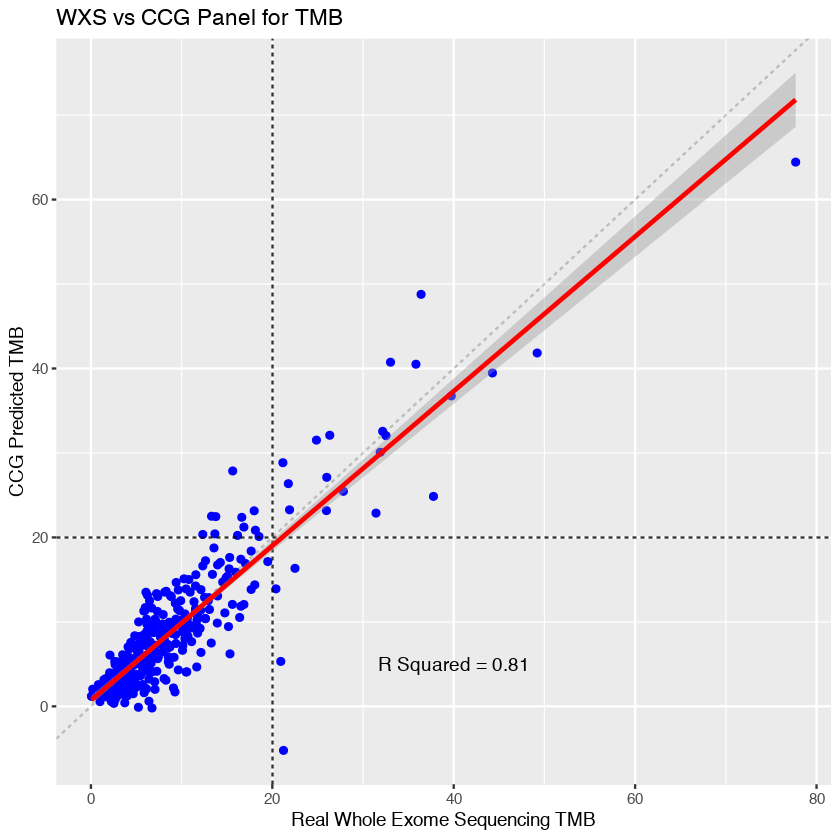

In [61]:
testModel(panel_lin_mod, test_matrix, type = "W") %>% 
    {ggplot(., aes(x = actual, y = prediction)) + geom_point(colour = "blue") + 
    labs(x = "Real Whole Exome Sequencing TMB", y = "CCG Predicted TMB") + 
    geom_abline(intercept = 0, slope = 1, alpha = 0.2, linetype = 2) +
    geom_hline(yintercept = 20, alpha = 0.8, linetype = 2) + geom_vline(xintercept = 20, alpha = 0.8, linetype = 2) + 
    geom_smooth(method = "lm", colour = "red") + labs(title = "WXS vs CCG Panel for TMB") +
    annotate("text", x = 40, y = 5, label = paste("R Squared =", round(broom::glance(lm(.$actual ~ .$prediction))$r.squared, 2)))}



In [48]:
impact_train_matrix <- get_gene_matrix(lung_data[["training_data"]], impact_panel) %>% 
    ungroup()
impact_train_matrix <- impact_train_matrix %>% 
    mutate(panel_mutations = rowSums(impact_train_matrix %>% select(-c(Tumor_Sample_Barcode, TMB)))) %>% 
    select(Tumor_Sample_Barcode, TMB, panel_mutations)

impact_test_matrix <- get_gene_matrix(lung_data[["test_data"]], impact_panel) %>% 
    ungroup()
impact_test_matrix <- impact_test_matrix %>% 
    mutate(panel_mutations = rowSums(impact_test_matrix %>% select(-c(Tumor_Sample_Barcode, TMB)))) %>%    
    select(Tumor_Sample_Barcode, TMB, panel_mutations)

In [49]:
impact_lin_mod <- lm(formula = TMB ~ panel_mutations, data = impact_train_matrix)

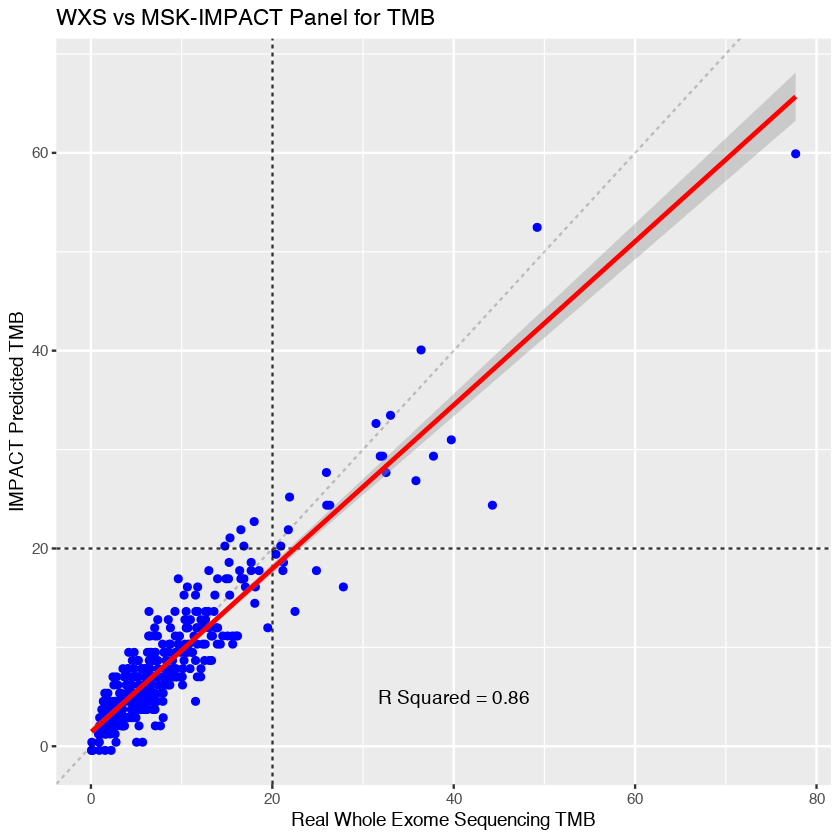

In [62]:
testModel(impact_lin_mod, impact_test_matrix, type = "W") %>% 
    {ggplot(., aes(x = actual, y = prediction)) + geom_point(colour = "blue") + 
    labs(x = "Real Whole Exome Sequencing TMB", y = "IMPACT Predicted TMB") + 
    geom_abline(intercept = 0, slope = 1, alpha = 0.2, linetype = 2) +
    geom_hline(yintercept = 20, alpha = 0.8, linetype = 2) + geom_vline(xintercept = 20, alpha = 0.8, linetype = 2) + 
    geom_smooth(method = "lm", colour = "red") + labs(title = "WXS vs MSK-IMPACT Panel for TMB") +
    annotate("text", x = 40, y = 5, label = paste("R Squared =", round(broom::glance(lm(.$actual ~ .$prediction))$r.squared, 2)))}

In [60]:
quantile(TMB_Calc(lung_data[["test_data"]])$TMB, 0.9)

90% 
16.53333

In [196]:
testModel(panel_lin_mod, test_matrix, type = "D")
testModel(impact_lin_mod, impact_test_matrix, type = "D")

[1] 13.40873

[1] 9.40626

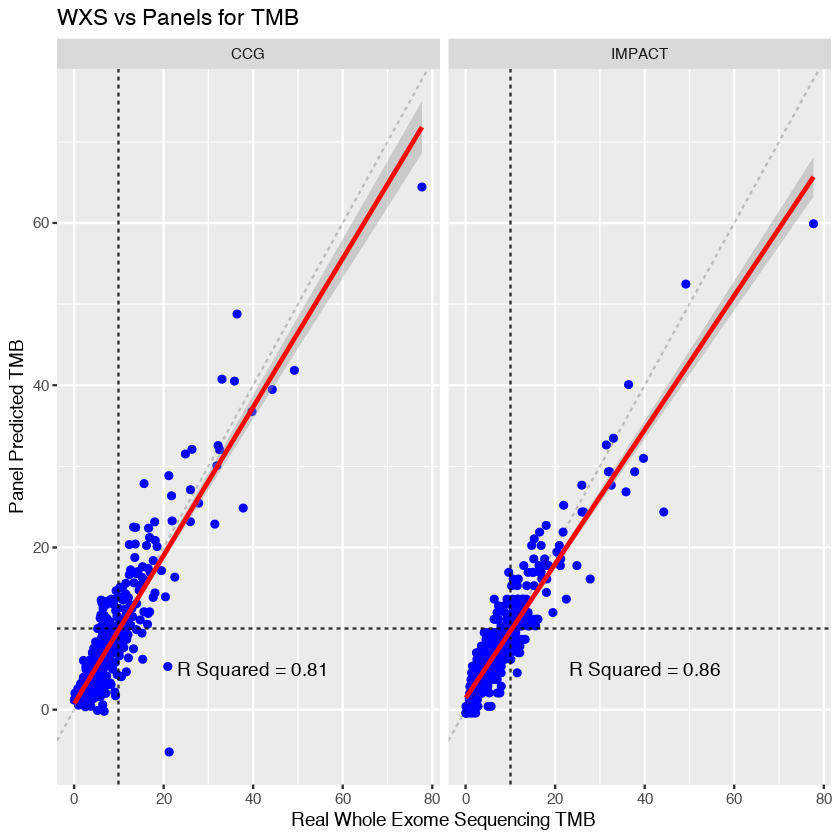

In [135]:
bind_rows(mutate(testModel(panel_lin_mod, test_matrix, type = "W"), Panel = "CCG"), mutate(testModel(impact_lin_mod, impact_test_matrix, type = "W"), Panel = "IMPACT")) %>% 
    {ggplot(., aes(x = actual, y = prediction)) + geom_point(colour = "blue") + 
    labs(x = "Real Whole Exome Sequencing TMB", y = "Panel Predicted TMB") + 
    geom_abline(intercept = 0, slope = 1, alpha = 0.2, linetype = 2) +
    geom_hline(yintercept = 10, alpha = 0.8, linetype = 2) + geom_vline(xintercept = 10, alpha = 0.8, linetype = 2) + 
    geom_smooth(method = "lm", colour = "red") + labs(title = "WXS vs Panels for TMB") +
    geom_text(data = tibble(x = c(40,40), y = c(5,5), label = paste("R Squared =", 
                                c(round(broom::glance(lm(actual ~ prediction, data = filter(., Panel == "CCG")))$r.squared, 2), 
                                  round(broom::glance(lm(actual ~ prediction, data = filter(., Panel == "IMPACT")))$r.squared, 2))), 
                            Panel = c("CCG", "IMPACT")), aes(x = x, y = y, label = label)) + facet_wrap(~Panel)}


In [183]:
cp_10 <- testModel(panel_lin_mod, test_matrix, type = "Con", threshold = 10)
cc_10 <- cp_10
cc_10[,c("Predicted_High", "Predicted_Low")]  <- nrow(test_matrix) * cc_10[,c("Predicted_High", "Predicted_Low")]

ss_10 <- testModel(panel_lin_mod, test_matrix, type = "C", threshold = 10)
print("CCG (Linear):")
cp_10
cc_10
ss_10

[1] "CCG (Linear):"


Actual,Predicted_High,Predicted_Low
High,0.23076923,0.06552707
Low,0.07977208,0.62393162


Actual,Predicted_High,Predicted_Low
High,81,23
Low,28,219


$sensitivity
[1] 0.7788462

$specificity
[1] 0.8866397

In [137]:
ip_10 <- testModel(impact_lin_mod, impact_test_matrix, type = "Con", threshold = 10)
ic_10 <- ip_10
ic_10[,c("Predicted_High", "Predicted_Low")]  <- nrow(impact_test_matrix) * ic_10[,c("Predicted_High", "Predicted_Low")]

is_10 <- testModel(impact_lin_mod, impact_test_matrix, type = "C", threshold = 10)


In [184]:
print("IMPACT")
ic_10
ip_10
is_10

[1] "IMPACT"


Actual,Predicted_High,Predicted_Low
High,87,17
Low,18,229


Actual,Predicted_High,Predicted_Low
High,0.24786325,0.04843305
Low,0.05128205,0.65242165


$sensitivity
[1] 0.8365385

$specificity
[1] 0.9271255

In [167]:
b10_lung_data <- list()
b10_lung_data[["training_data"]] <- balance_data(lung_data[["training_data"]], threshold = 10)
b10_lung_data[["test_data"]] <- lung_data[["test_data"]]

In [168]:
panel_lin_mod_b10 <- get_gene_model(tmb_panel$panel, b10_lung_data[["training_data"]])
panel_rf_mod_b10 <- get_gene_f_model(tmb_panel$panel, b10_lung_data[["training_data"]])
panel_svm_mod_b10 <- get_gene_svm_model(tmb_panel$panel, b10_lung_data[["training_data"]])

In [194]:
svp_10 <- testModel(panel_svm_mod, test_matrix, type = "Con", threshold = 10)
svc_10 <- svp_10
svc_10[,c("Predicted_High", "Predicted_Low")]  <- nrow(impact_test_matrix) * svc_10[,c("Predicted_High", "Predicted_Low")]

svs_10 <- testModel(panel_svm_mod, test_matrix, type = "C", threshold = 10)

In [195]:
print("CCG SVM (Imbalanced)")
svp_10
svc_10
svs_10

[1] "CCG SVM (Imbalanced)"


Actual,Predicted_High,Predicted_Low
High,0.25356125,0.04273504
Low,0.08547009,0.61823362


Actual,Predicted_High,Predicted_Low
High,89,15
Low,30,217


$sensitivity
[1] 0.8557692

$specificity
[1] 0.8785425

In [191]:
bp_10 <- testModel(panel_svm_mod_b10, test_matrix, type = "Con", threshold = 10)
bc_10 <- bp_10
bc_10[,c("Predicted_High", "Predicted_Low")]  <- nrow(impact_test_matrix) * bc_10[,c("Predicted_High", "Predicted_Low")]

bs_10 <- testModel(panel_svm_mod_b10, test_matrix, type = "C", threshold = 10)


In [193]:
print("CCG SVM (Balanced)")
bp_10
bc_10
bs_10

[1] "CCG SVM (Balanced)"


Actual,Predicted_High,Predicted_Low
High,0.2678063,0.02849003
Low,0.1253561,0.57834758


Actual,Predicted_High,Predicted_Low
High,94,10
Low,44,203


$sensitivity
[1] 0.9038462

$specificity
[1] 0.8218623

In [217]:
tmb_data %>% 
    TMB_Calc() %>% 
    pull(TMB) %>% 
    max()
    

[1] 7.1

In [218]:
lung_data[["training_data"]] %>% 
    TMB_Calc() 

Tumor_Sample_Barcode,study,TMB
LUAD_E00522-Tumor,nsclc_tcga_broad_2016,34.133333
LUAD_E00623-Tumor,nsclc_tcga_broad_2016,25.700000
LUAD_E00703-Tumor,nsclc_tcga_broad_2016,1.733333
LUAD_E00945-Tumor,nsclc_tcga_broad_2016,2.066667
LUAD_E01047-Tumor,nsclc_tcga_broad_2016,8.733333
LUAD_E01147-Tumor,nsclc_tcga_broad_2016,7.600000
LUAD_E01166-Tumor,nsclc_tcga_broad_2016,4.466667
LUAD_E01319-Tumor,nsclc_tcga_broad_2016,1.133333
LUAD_E01419-Tumor,nsclc_tcga_broad_2016,2.366667
LUAD-2GUGK-Tumor,nsclc_tcga_broad_2016,7.900000


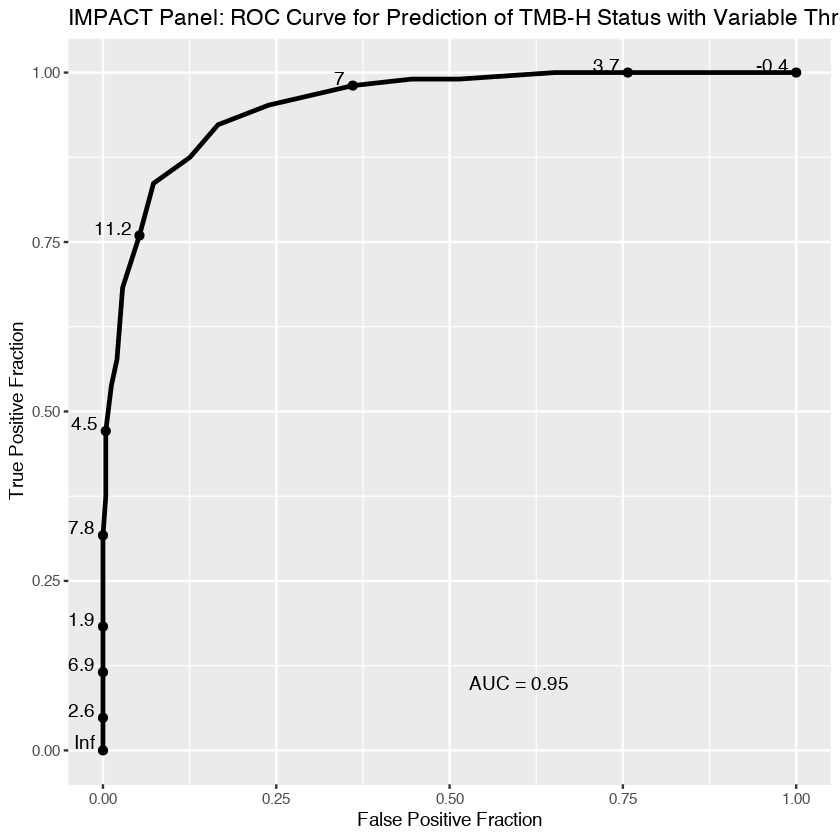

In [209]:
imp_comp <- tibble(prediction = predict(impact_lin_mod, impact_test_matrix), 
                               actual = impact_test_matrix$TMB >= 10, model = "IMPACT")
imp_comp %>% 
    {ggplot(., aes(d = actual, m = prediction)) + geom_roc() + 
     ggtitle("IMPACT Panel: ROC Curve for Prediction of TMB-H Status with Variable Thresholds") +
     labs(x = "False Positive Fraction", y = "True Positive Fraction")} %>% 
    {. + annotate("text", x = 0.6, y = 0.1, label = paste("AUC =", round(calc_auc(.)$AUC[1], 2)))}

In [230]:
comparison <- bind_rows(tibble(prediction = predict(impact_lin_mod, impact_test_matrix), 
                               actual = impact_test_matrix$TMB >= 10, Model = "IMPACT"),
                        tibble(prediction = predict(panel_lin_mod, test_matrix),
                              actual = test_matrix$TMB >= 10, Model = "CCG (Linear)"),
                        tibble(prediction = predict(panel_rf_mod, test_matrix), 
                               actual = test_matrix$TMB >= 10, Model = "CCG (RF)"),
                        tibble(prediction = predict(panel_svm_mod, test_matrix),
                              actual = test_matrix$TMB >= 10, Model = "CCG (SVM)"))

In [231]:
p <- comparison %>% 
    ggplot(aes(d = actual, m = prediction, colour = Model)) + geom_roc()  

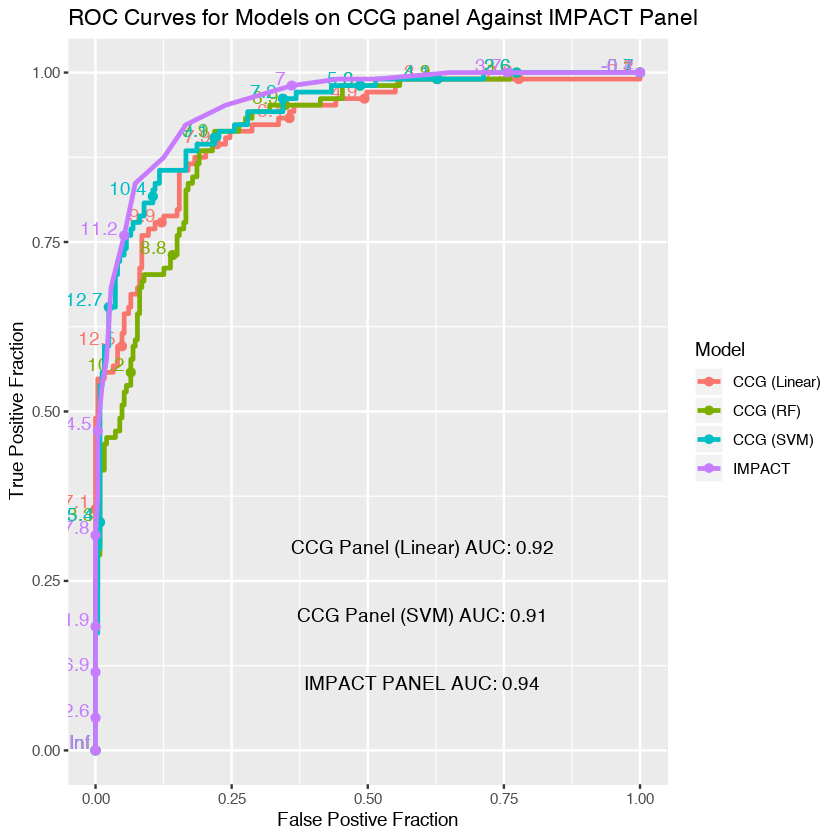

In [232]:
p + annotate("text", x = 0.6, y = 0.3, label = paste("CCG Panel (Linear) AUC:", round(calc_auc(p)$AUC[1], 2))) +
    annotate("text", x = 0.6, y = 0.2, label = paste("CCG Panel (SVM) AUC:", round(calc_auc(p)$AUC[2], 2))) +
    annotate("text", x = 0.6, y = 0.1, label = paste("IMPACT PANEL AUC:", round(calc_auc(p)$AUC[3], 2))) +
    labs(title = "ROC Curves for Models on CCG panel Against IMPACT Panel", x = "False Postive Fraction", y = "True Positive Fraction")

In [97]:
lung_data[["training_data"]] %>% 
    pull(Tumor_Sample_Barcode) %>% 
    unique() %>% 
    length()
lung_data[["test_data"]] %>% 
    pull(Tumor_Sample_Barcode) %>% 
    unique() %>% 
    length()

[1] 793

[1] 351

In [99]:
lung_data[["training_data"]] %>% 
    pull(study) %>% 
    unique()

[1] "nsclc_tcga_broad_2016"